<a href="https://colab.research.google.com/github/ahmer-talal/Neural-Networks/blob/main/Custom_FaceRecognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Required Libraries**

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


### **Extract Images (Dataset)**

In [6]:
!unzip dataset.zip


Archive:  dataset.zip
replace dataset/ahmer/20241128_125539.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### **Load n Prepare Dataset**

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_SIZE = (160,160)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)


Found 40 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)  # Example output: ['ahmer', 'others']


['ahmer', 'others']


### **Normalization** (for pixels detection)

In [9]:
train_ds = train_ds.map(lambda x, y: (x/255.0, y))
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)



### **Visualize** before training n check the input labels

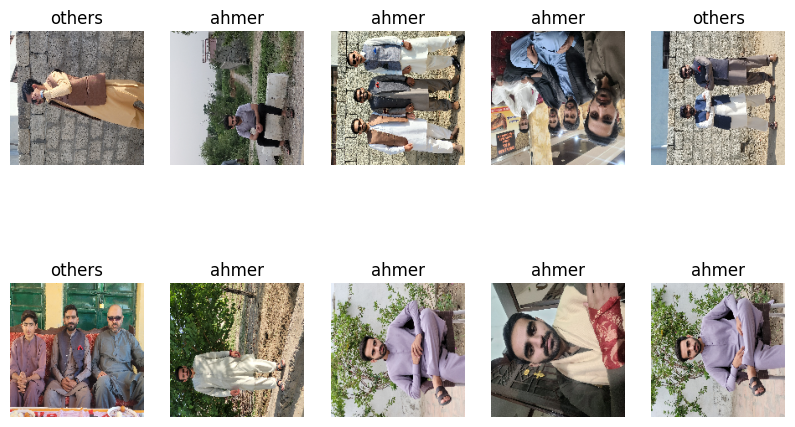

In [11]:
plt.figure(figsize=(10,6))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()

### **Building CNN Architecture**

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(160,160,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Training of CNN Model**

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(train_ds, epochs=20)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6578 - loss: 1.0610
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8984 - loss: 0.3238
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7469 - loss: 0.4080
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8516 - loss: 0.3152
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8922 - loss: 0.2535
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8875 - loss: 0.2102
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.1027
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0778
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0204
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0145
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0011
Epo

## **Testing**

In [17]:
img = image.load_img("dataset/ahmer/20251023_202614.jpg", target_size=IMG_SIZE)
img = image.img_to_array(img)/255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)[0][0]
print("Ahmer" if pred > 0.5 else "Other", pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Other 0.05585249


### **Testing on Random Inputs**

In [18]:
from google.colab import files

uploaded = files.upload()

Saving suit-crop.jpeg to suit-crop.jpeg


In [19]:
test_image_path = list(uploaded.keys())[0]
print("Uploaded image:", test_image_path)

Uploaded image: suit-crop.jpeg


In [20]:
from tensorflow.keras.preprocessing import image

img = image.load_img(test_image_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


✅ Prediction: Ahmer (0.86)


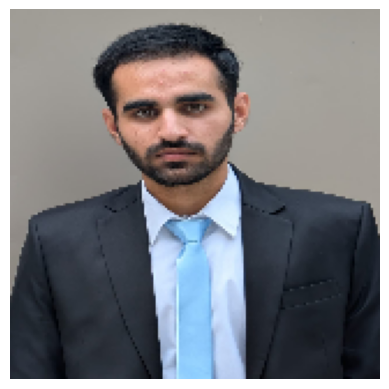

In [21]:
plt.imshow(img)
plt.axis("off")

if prediction > 0.5:
    print(f"✅ Prediction: Ahmer ({prediction:.2f})")
else:
    print(f"❌ Prediction: Other ({1 - prediction:.2f})")


### **Another Random Input**

Saving 20241019_163437.jpg to 20241019_163437.jpg
Uploaded image: 20241019_163437.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ Prediction: Ahmer (0.92)


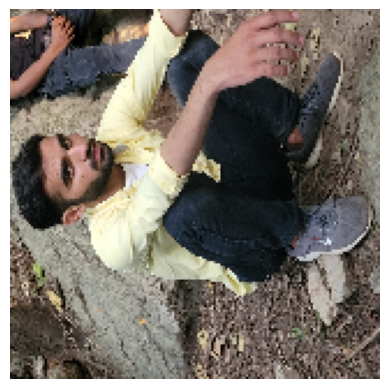

In [25]:
from google.colab import files
uploaded = files.upload()

test_image_path = list(uploaded.keys())[0]
print("Uploaded image:", test_image_path)\

from tensorflow.keras.preprocessing import image

img = image.load_img(test_image_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

plt.imshow(img)
plt.axis("off")

if prediction > 0.5:
    print(f"✅ Prediction: Ahmer ({prediction:.2f})")
else:
    print(f"❌ Prediction: Other ({1 - prediction:.2f})")

Saving muji.png to muji.png
Uploaded image: muji.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
❌ Prediction: Other (0.63)


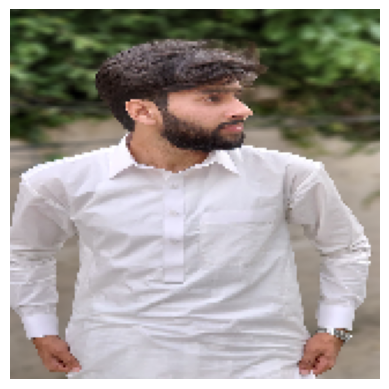

In [28]:
from google.colab import files
uploaded = files.upload()

test_image_path = list(uploaded.keys())[0]
print("Uploaded image:", test_image_path)\

from tensorflow.keras.preprocessing import image

img = image.load_img(test_image_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

plt.imshow(img)
plt.axis("off")

if prediction > 0.5:
    print(f"✅ Prediction: Ahmer ({prediction:.2f})")
else:
    print(f"❌ Prediction: Other ({1 - prediction:.2f})")